In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/Dacon_RF_parameter_tuning

/content/drive/MyDrive/Dacon_RF_parameter_tuning


In [ ]:
ls

 0328_submit.ipynb                               EDA.ipynb               submit.ipynb
 0331_BayesianOptimization_최고점변형.ipynb      github_upload/          test_grid.ipynb
 0401_EDA2.ipynb                                 grid_test2.ipynb       'test_grid.ipynb의 사본'
 BayesianOptimization.ipynb                      sample_submission.csv   train.csv
 BayesianOptimization_최고점여러번돌리기.ipynb   submit/


In [ ]:
# 대회 제공 시드로 고정
import random
random.seed(42)

In [ ]:
import pandas as pd
import numpy as np
from pandas import DataFrame

In [ ]:
train = pd.read_csv('train.csv')
train.head()

,person_id,Sex,past_login_total,past_1_month_login,past_1_week_login,sub_size,email_type,phone_rat,apple_rat,login
0,0,0,3.0,1.0,1.0,0.0,0,0.000000,0.000000,1
1,1,1,111.0,26.0,7.0,2.0,0,0.072072,0.000000,1
2,3,1,13.0,13.0,11.0,7.0,0,0.076923,1.000000,1
3,4,1,28.0,12.0,5.0,0.0,0,0.071429,0.071429,1
4,5,1,4.0,4.0,4.0,0.0,2,0.000000,0.000000,1


# 1. 분포
- 열 별 고유값 확인

In [ ]:
train['Sex'].value_counts()

0    708
1    601
Name: Sex, dtype: int64

In [ ]:
train['past_login_total'].value_counts()

1.0      569
2.0      147
0.0      139
3.0       82
4.0       55
        ... 
134.0      1
77.0       1
111.0      1
33.0       1
42.0       1
Name: past_login_total, Length: 69, dtype: int64

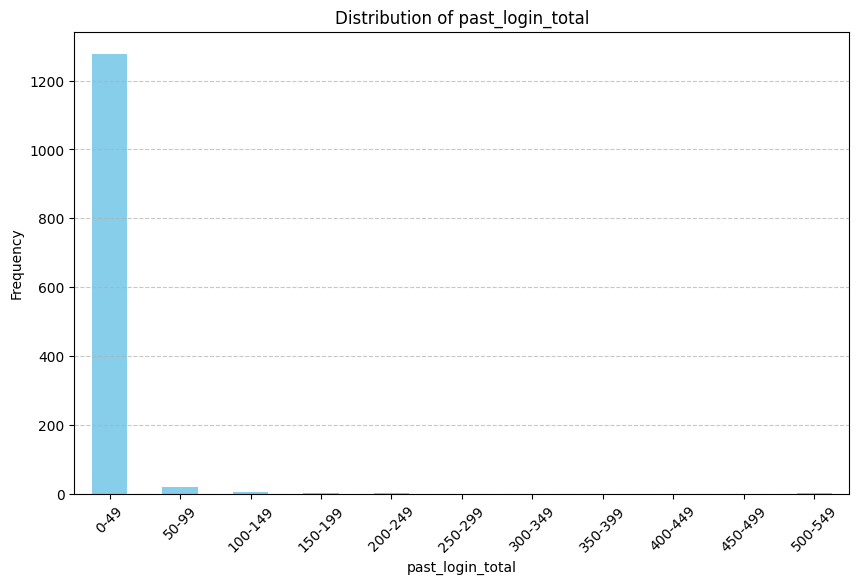

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# train 데이터프레임에서 past_login_total 열 추출
past_login_total = train['past_login_total']

# 막대그래프를 그리기 위한 연속형 데이터의 분포 계산
bin_edges = range(0, int(past_login_total.max()) + 50, 50)
bin_labels = [f'{i}-{i+49}' for i in bin_edges[:-1]]  # 막대그래프의 x축 라벨 생성
binned_data = pd.cut(past_login_total, bins=bin_edges, labels=bin_labels, include_lowest=True)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
binned_data.value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of past_login_total')
plt.xlabel('past_login_total')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.grid(axis='y', linestyle='--', alpha=0.7)  # y축 그리드 라인 추가
plt.show()


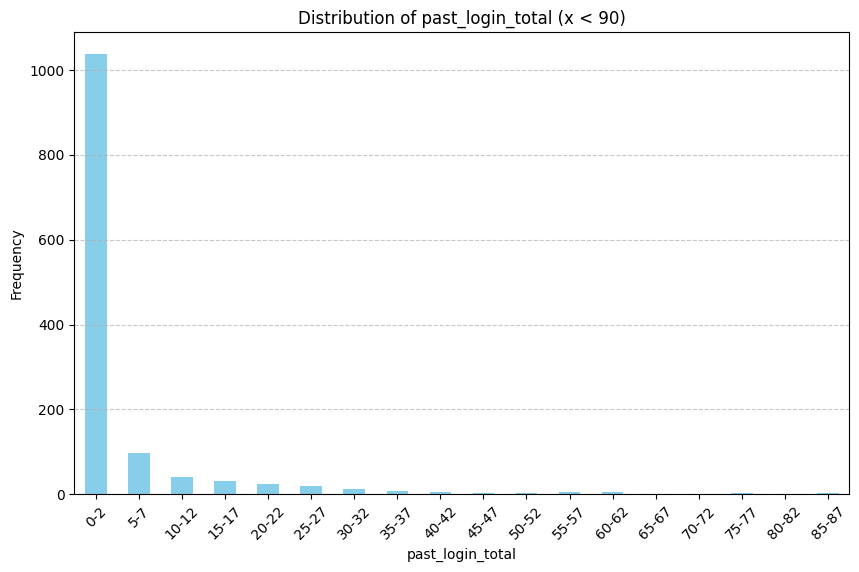

In [ ]:
# 위 그래프에서 x축이 90 이하인 부분만 확대
import pandas as pd
import matplotlib.pyplot as plt

# train 데이터프레임에서 past_login_total 열 추출
past_login_total = train['past_login_total']

# 250 미만인 부분만 필터링
filtered_data = past_login_total[past_login_total < 90]

# 막대그래프를 그리기 위한 연속형 데이터의 분포 계산
bin_edges = range(0, int(filtered_data.max()) + 5, 5)
bin_labels = [f'{i}-{i+2}' for i in bin_edges[:-1]]  # 막대그래프의 x축 라벨 생성
binned_data = pd.cut(filtered_data, bins=bin_edges, labels=bin_labels, include_lowest=True)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
binned_data.value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of past_login_total (x < 90)')
plt.xlabel('past_login_total')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.grid(axis='y', linestyle='--', alpha=0.7)  # y축 그리드 라인 추가
plt.show()

In [ ]:
train['past_1_month_login'].value_counts()

0.0     1113
1.0       92
2.0       33
3.0       17
6.0       13
5.0        9
4.0        9
8.0        3
11.0       3
9.0        3
12.0       3
7.0        2
26.0       1
27.0       1
93.0       1
17.0       1
13.0       1
21.0       1
29.0       1
10.0       1
18.0       1
Name: past_1_month_login, dtype: int64

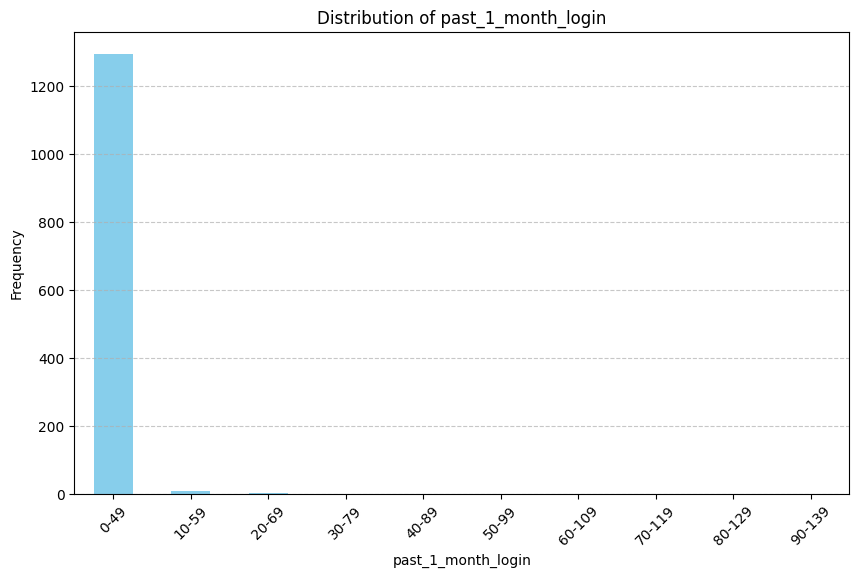

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# train 데이터프레임에서 past_1_month_login 열 추출
past_1_month_login = train['past_1_month_login']

# 막대그래프를 그리기 위한 연속형 데이터의 분포 계산
bin_edges = range(0, int(past_1_month_login.max()) + 10, 10)
bin_labels = [f'{i}-{i+49}' for i in bin_edges[:-1]]  # 막대그래프의 x축 라벨 생성
binned_data = pd.cut(past_1_month_login, bins=bin_edges, labels=bin_labels, include_lowest=True)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
binned_data.value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of past_1_month_login')
plt.xlabel('past_1_month_login')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.grid(axis='y', linestyle='--', alpha=0.7)  # y축 그리드 라인 추가
plt.show()

In [ ]:
train['past_1_week_login'].value_counts()

0.0     1185
1.0       65
2.0       22
4.0        8
3.0        8
5.0        7
6.0        5
7.0        2
11.0       2
8.0        2
9.0        1
23.0       1
17.0       1
Name: past_1_week_login, dtype: int64

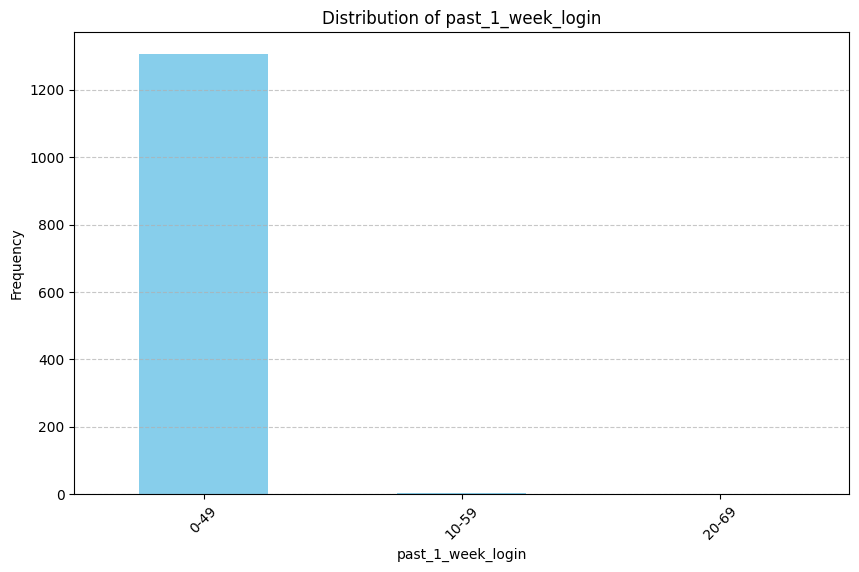

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# train 데이터프레임에서 past_1_week_login 열 추출
past_1_week_login = train['past_1_week_login']

# 막대그래프를 그리기 위한 연속형 데이터의 분포 계산
bin_edges = range(0, int(past_1_week_login.max()) + 10, 10)
bin_labels = [f'{i}-{i+49}' for i in bin_edges[:-1]]  # 막대그래프의 x축 라벨 생성
binned_data = pd.cut(past_1_week_login, bins=bin_edges, labels=bin_labels, include_lowest=True)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
binned_data.value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of past_1_week_login')
plt.xlabel('past_1_week_login')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.grid(axis='y', linestyle='--', alpha=0.7)  # y축 그리드 라인 추가
plt.show()

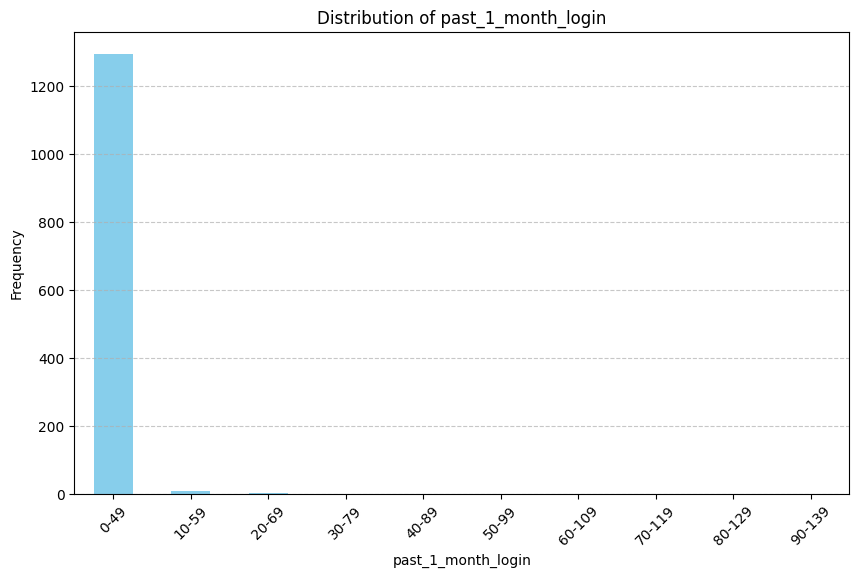

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# train 데이터프레임에서 past_1_month_login 열 추출
past_1_month_login = train['past_1_month_login']

# 막대그래프를 그리기 위한 연속형 데이터의 분포 계산
bin_edges = range(0, int(past_1_month_login.max()) + 10, 10)
bin_labels = [f'{i}-{i+49}' for i in bin_edges[:-1]]  # 막대그래프의 x축 라벨 생성
binned_data = pd.cut(past_1_month_login, bins=bin_edges, labels=bin_labels, include_lowest=True)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
binned_data.value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of past_1_month_login')
plt.xlabel('past_1_month_login')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.grid(axis='y', linestyle='--', alpha=0.7)  # y축 그리드 라인 추가
plt.show()

In [ ]:
train['sub_size'].value_counts()

0.0      1094
1.0        38
2.0        24
3.0        16
6.0        11
9.0        11
5.0         9
4.0         9
23.0        7
12.0        7
11.0        6
10.0        5
17.0        4
15.0        4
20.0        3
25.0        3
18.0        3
8.0         3
7.0         3
28.0        3
21.0        2
14.0        2
19.0        2
16.0        2
30.0        2
27.0        2
13.0        2
34.0        2
26.0        2
80.0        1
24.0        1
76.0        1
38.0        1
59.0        1
95.0        1
39.0        1
100.0       1
64.0        1
63.0        1
48.0        1
29.0        1
43.0        1
282.0       1
110.0       1
139.0       1
45.0        1
163.0       1
22.0        1
32.0        1
46.0        1
149.0       1
91.0        1
166.0       1
99.0        1
358.0       1
33.0        1
96.0        1
Name: sub_size, dtype: int64

In [ ]:
train['email_type'].value_counts()

0    794
1    276
2    166
3     44
4     29
Name: email_type, dtype: int64

In [ ]:
train['login'].value_counts()

0    1163
1     146
Name: login, dtype: int64

In [ ]:
train['apple_rat'].value_counts()

0.000000    958
1.000000    253
0.500000     10
0.250000      5
0.400000      4
           ... 
0.714286      1
0.016304      1
0.037037      1
0.142857      1
0.769231      1
Name: apple_rat, Length: 61, dtype: int64

분석 -> 성별 외에는 데이터가 대부분 0에 가깝게 크게 편향되어 있음

# 2. 결측값

In [ ]:
train.isnull().sum()

person_id             0
Sex                   0
past_login_total      0
past_1_month_login    0
past_1_week_login     0
sub_size              0
email_type            0
phone_rat             0
apple_rat             0
login                 0
dtype: int64

- person_id: 유저별 고유 아이디
- Sex: 성별
- past_login_total: 과거(5월 8일 이전)에 로그인한 총 횟수
- past_1_month_login: 과거 1달간 로그인한 총 횟수
- past_1_week_login: 과거 1주간 로그인한 총 횟수
- sub_size: 과거에 데이콘 대회에서의 총 제출 수
- email_type: 가입한 이메일 종류
- phone_rat: 폰으로 접속한 비율
- apple_rat: 애플 기기로 접속한 비율
- login: 로그인 여부

# 3. 열 별 통계 및 이상값 확인
- histogram
- box plot

In [ ]:
train.describe() # 전체 요약 통계량

,person_id,Sex,past_login_total,past_1_month_login,past_1_week_login,sub_size,email_type,phone_rat,apple_rat,login
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,1093.045073,0.459129,6.761650,0.577540,0.252865,3.190222,0.653934,0.134254,0.226160,0.111536
std,629.978680,0.498517,21.813773,3.309168,1.233857,17.787903,0.973750,0.307792,0.404821,0.314914
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,559.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1105.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1634.000000,1.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.129032,0.000000
max,2182.000000,1.000000,503.000000,93.000000,23.000000,358.000000,4.000000,1.000000,1.000000,1.000000


3-1) sex

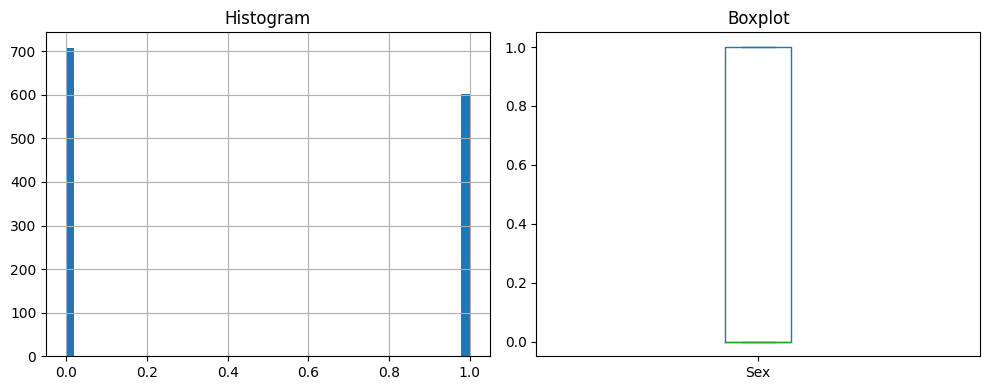

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train['Sex'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train['Sex'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

# Show the plot
plt.show()

3-2) past_login_total
- 분석 결과 : 0에 많이 편향되어 있으며, 이상값 500 존재


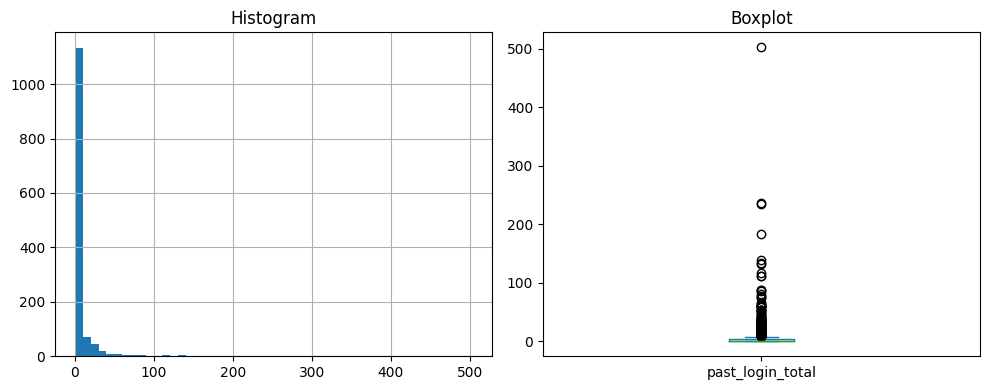

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train['past_login_total'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train['past_login_total'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
train['past_login_total'].describe()

count    1309.000000
mean        6.761650
std        21.813773
min         0.000000
25%         1.000000
50%         1.000000
75%         4.000000
max       503.000000
Name: past_login_total, dtype: float64

3-3) past_1_month_login
- 분석 결과: 100에 이상치 존재. past_login_total이 500으로 이상값을 가지는 행과 같은 행이라 의심
- 이 데이터를 제외하고 파라미터 찾으면 성능 향상?

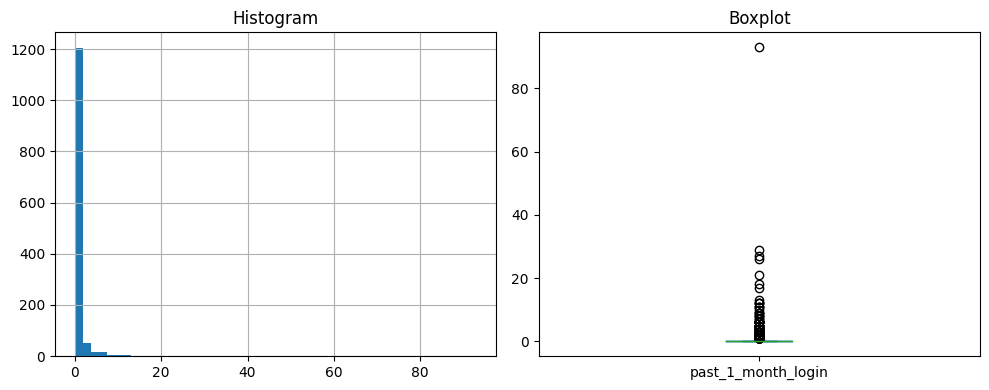

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train['past_1_month_login'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train['past_1_month_login'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
train['past_1_month_login'].describe()

count    1309.000000
mean        0.577540
std         3.309168
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        93.000000
Name: past_1_month_login, dtype: float64

3-4) past_1_week_login

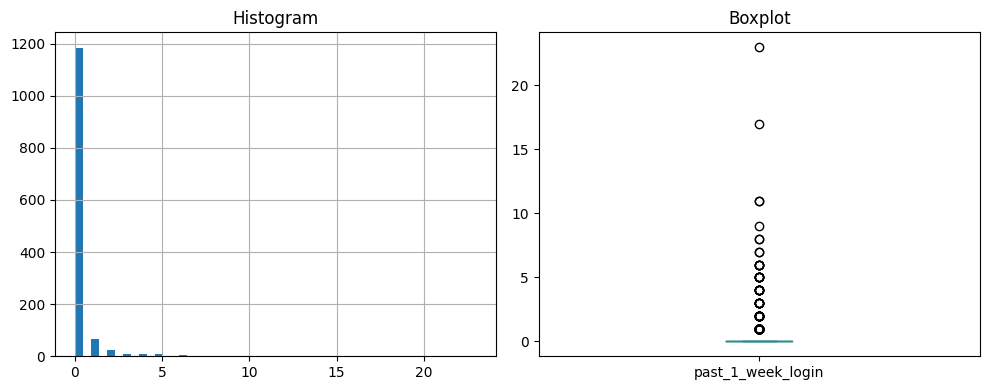

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train['past_1_week_login'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train['past_1_week_login'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
train['past_1_week_login'].describe()

count    1309.000000
mean        0.252865
std         1.233857
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        23.000000
Name: past_1_week_login, dtype: float64

3-5) sub_size

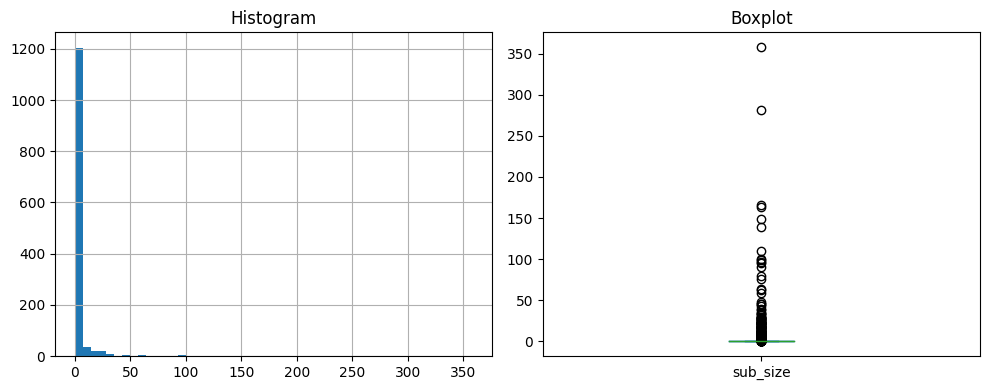

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train['sub_size'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train['sub_size'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
train['sub_size'].describe()

count    1309.000000
mean        3.190222
std        17.787903
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       358.000000
Name: sub_size, dtype: float64

5-6) email_type


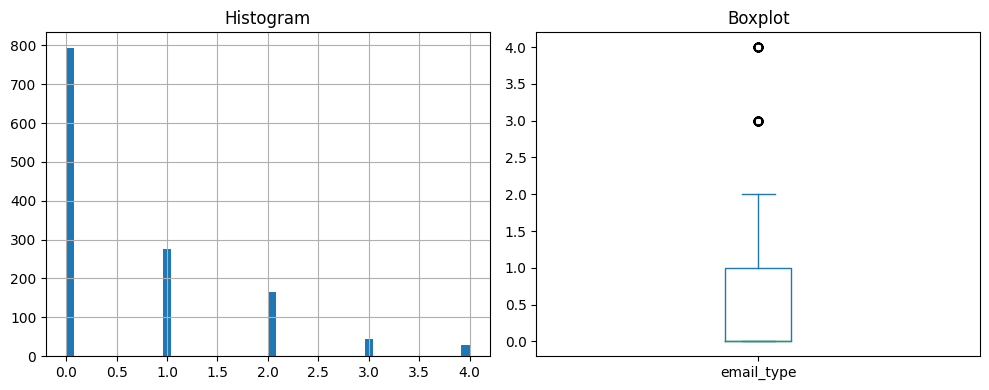

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train['email_type'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train['email_type'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
train['email_type'].describe()

count    1309.000000
mean        0.653934
std         0.973750
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         4.000000
Name: email_type, dtype: float64

5-7) phone_rat

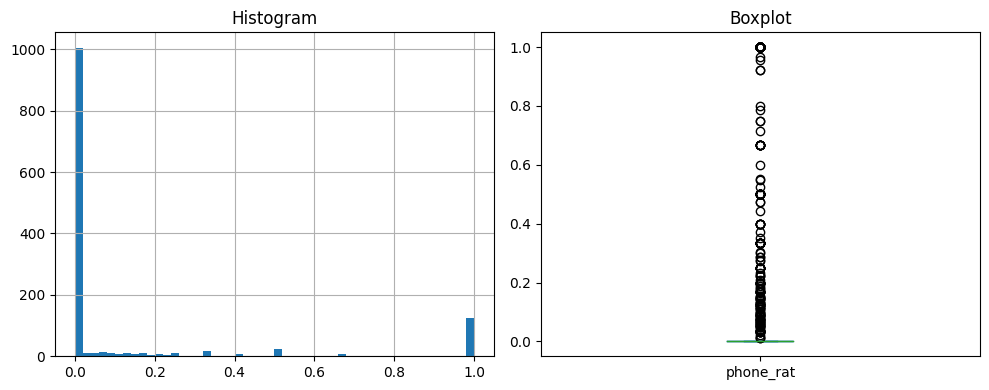

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train['phone_rat'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train['phone_rat'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
train['phone_rat'].describe()

count    1309.000000
mean        0.134254
std         0.307792
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: phone_rat, dtype: float64

5-8) apple_rat

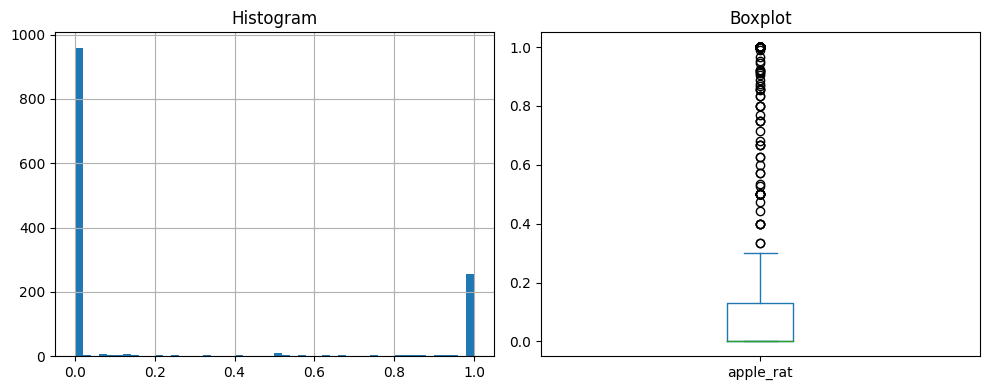

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train['apple_rat'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train['apple_rat'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
train['apple_rat'].describe()

count    1309.000000
mean        0.226160
std         0.404821
min         0.000000
25%         0.000000
50%         0.000000
75%         0.129032
max         1.000000
Name: apple_rat, dtype: float64

5-9) login

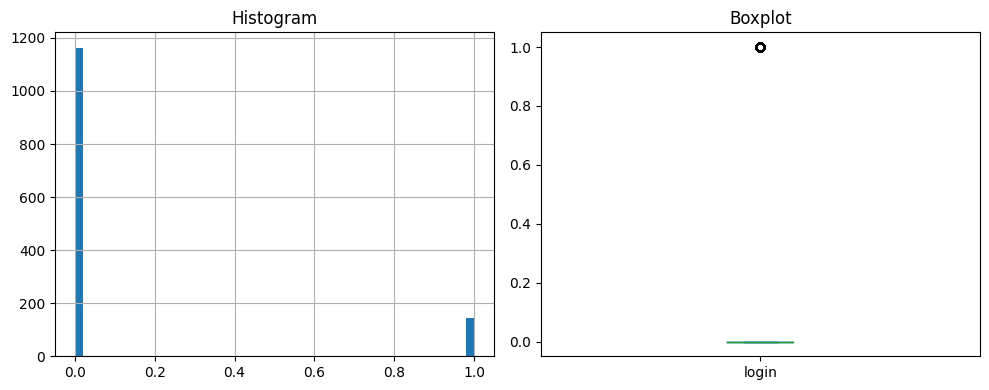

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train['login'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train['login'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
train['login'].describe()

count    1309.000000
mean        0.111536
std         0.314914
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: login, dtype: float64

# 5. 이상값 처리
- train2라는 data frame 만들어 이상값 처리 테스트

In [ ]:
train2 = pd.read_csv('train.csv')
train2.head(3)

,person_id,Sex,past_login_total,past_1_month_login,past_1_week_login,sub_size,email_type,phone_rat,apple_rat,login
0,0,0,3.0,1.0,1.0,0.0,0,0.000000,0.0,1
1,1,1,111.0,26.0,7.0,2.0,0,0.072072,0.0,1
2,3,1,13.0,13.0,11.0,7.0,0,0.076923,1.0,1


In [ ]:
# train DataFrame에서 past_login_total 열의 값이 최대인 행(=이상값 가진 행) 찾기
max_past_login_total = train2['past_login_total'].max()
max_past_login_total_index = train2[train2['past_login_total'] == max_past_login_total].index
print(train2.loc[max_past_login_total_index]) # 해당 행 출력


     person_id  Sex  past_login_total  past_1_month_login  past_1_week_login  \
264        450    1             503.0                 0.0                0.0   

     sub_size  email_type  phone_rat  apple_rat  login  
264       0.0           2   0.099404   0.129225      1  


In [ ]:
# 최대값을 가진 행 삭제
train2.drop(max_past_login_total_index, inplace=True)

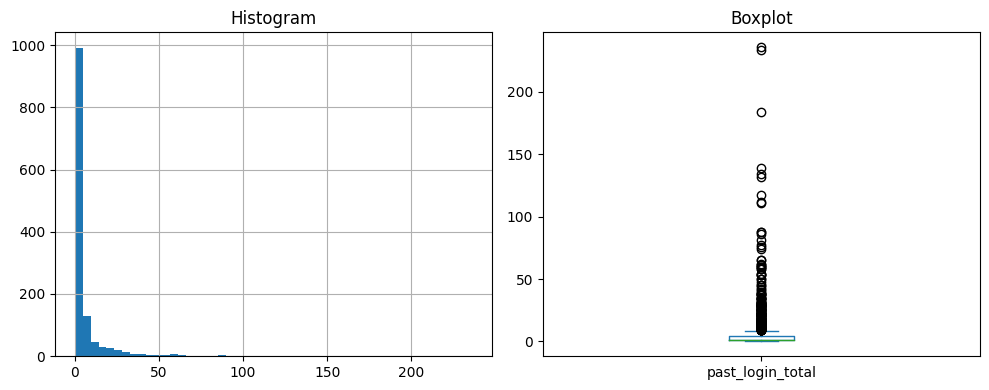

In [ ]:
# 이상값 처리한 후 boxplot
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train2['past_login_total'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train2['past_login_total'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

# Show the plot
plt.show()

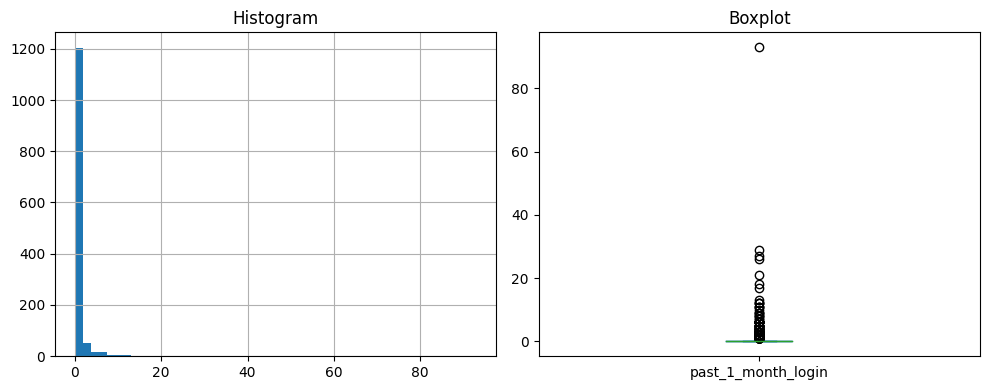

In [ ]:
# 위 이상값 처리하면 처리될 줄 알았던 past_1_month_login열의 이상값이 처리 안됨을 확인
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train2['past_1_month_login'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train2['past_1_month_login'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# past_1_month_login열의 이상값 삭제
# train DataFrame에서 past_1_month_login 열의 값이 최대인 행(=이상값 가진 행) 찾기
max_past_1_month_login = train2['past_1_month_login'].max()
max_past_1_month_login_index = train2[train2['past_1_month_login'] == max_past_1_month_login].index
print(train2.loc[max_past_1_month_login_index]) # 해당 행 출력


    person_id  Sex  past_login_total  past_1_month_login  past_1_week_login  \
34         49    1             236.0                93.0               17.0   

    sub_size  email_type  phone_rat  apple_rat  login  
34      17.0           0   0.194915        0.0      1  


In [ ]:
# 최대값을 가진 행 삭제
train2.drop(max_past_1_month_login_index, inplace=True)

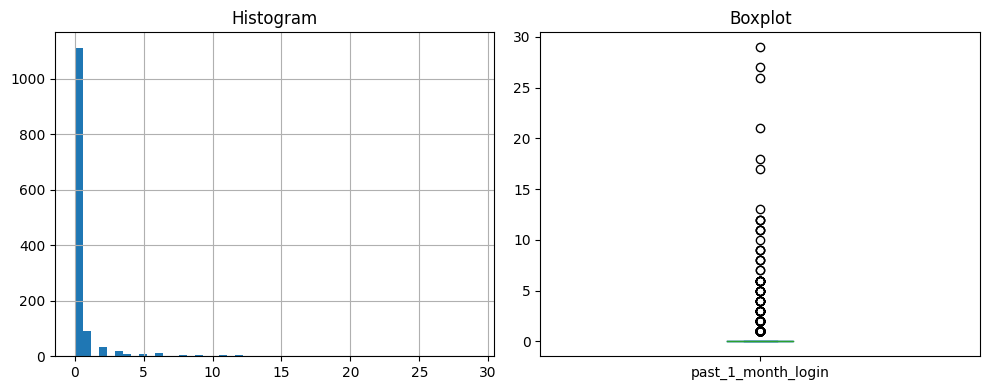

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train2['past_1_month_login'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train2['past_1_month_login'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

# Show the plot
plt.show()

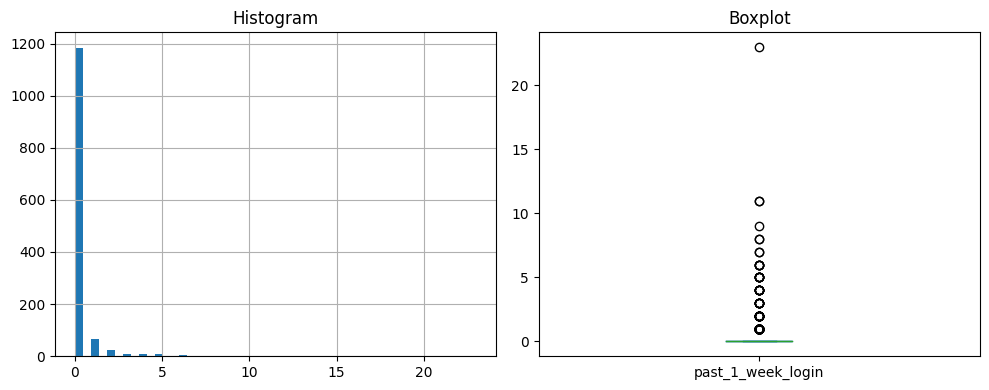

In [ ]:
# past_1_week_login열 이상값 처리 - 2개 행 삭제
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train2['past_1_week_login'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train2['past_1_week_login'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# past_1_month_login열의 이상값 삭제
# train DataFrame에서 past_1_month_login 열의 값이 최대인 행(=이상값 가진 행) 찾기
max_past_1_week_login = train2['past_1_week_login'].max()
max_past_1_week_login_index = train2[train2['past_1_week_login'] == max_past_1_week_login].index
print(train2.loc[max_past_1_week_login_index]) # 해당 행 출력

# 최대값을 가진 행 삭제
train2.drop(max_past_1_week_login_index, inplace=True)

    person_id  Sex  past_login_total  past_1_month_login  past_1_week_login  \
27         37    0              53.0                27.0               23.0   

    sub_size  email_type  phone_rat  apple_rat  login  
27      45.0           0   0.226415        0.0      1  


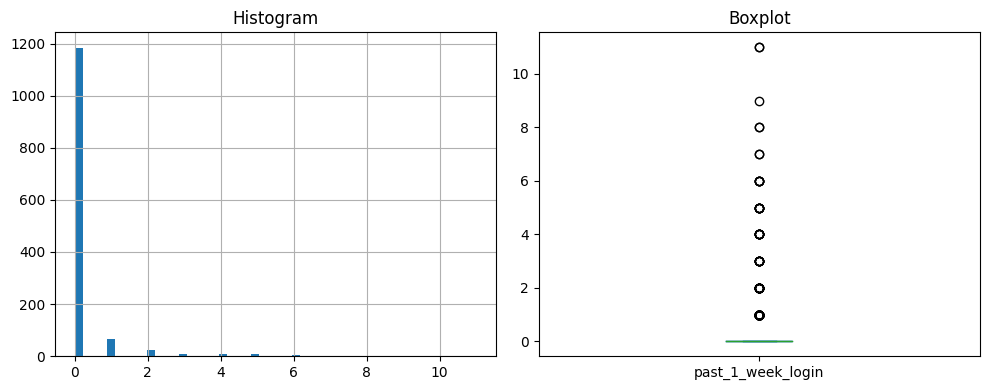

In [ ]:
# past_1_week_login열 이상값 처리 - 2개 행 삭제
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train2['past_1_week_login'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train2['past_1_week_login'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

# Show the plot
plt.show()

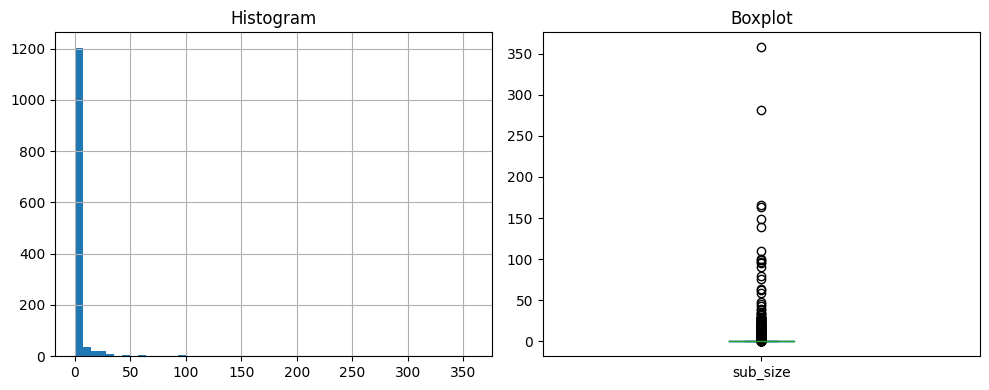

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train2['sub_size'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train2['sub_size'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# sub_size열의 이상값 삭제
# train DataFrame에서 past_1_month_login 열의 값이 최대인 행(=이상값 가진 행) 찾기
max_sub_size = train2['sub_size'].max()
max_sub_size_index = train2[train2['sub_size'] == max_sub_size].index
print(train2.loc[max_sub_size_index]) # 해당 행 출력

# 최대값을 가진 행 삭제
train2.drop(max_sub_size_index, inplace=True)

     person_id  Sex  past_login_total  past_1_month_login  past_1_week_login  \
203        336    1               1.0                 1.0                0.0   

     sub_size  email_type  phone_rat  apple_rat  login  
203     358.0           2        0.0        1.0      1  


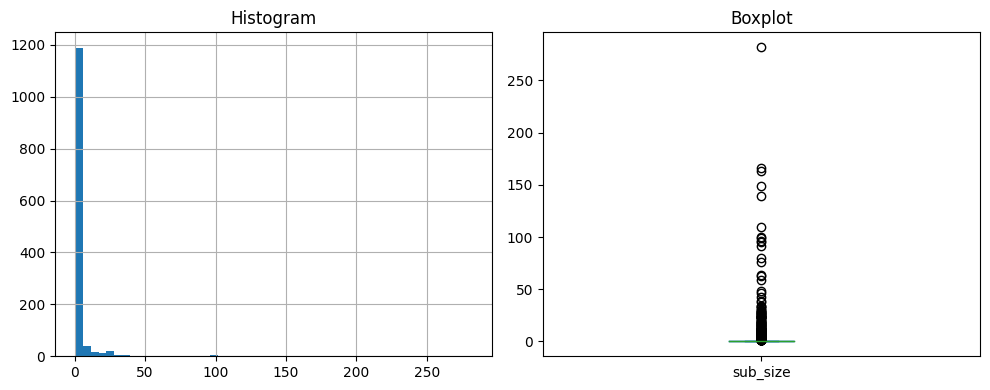

In [ ]:
# sub_size 열의 이상값 하나 삭제한 결과
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train2['sub_size'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train2['sub_size'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# sub_size 열의 이상값 하나 더 삭제
# train DataFrame에서 past_1_month_login 열의 값이 최대인 행(=이상값 가진 행) 찾기
max_sub_size = train2['sub_size'].max()
max_sub_size_index = train2[train2['sub_size'] == max_sub_size].index
print(train2.loc[max_sub_size_index]) # 해당 행 출력

# 최대값을 가진 행 삭제
train2.drop(max_sub_size_index, inplace=True)

     person_id  Sex  past_login_total  past_1_month_login  past_1_week_login  \
428        730    0             184.0                 0.0                0.0   

     sub_size  email_type  phone_rat  apple_rat  login  
428     282.0           2      0.125   0.016304      1  


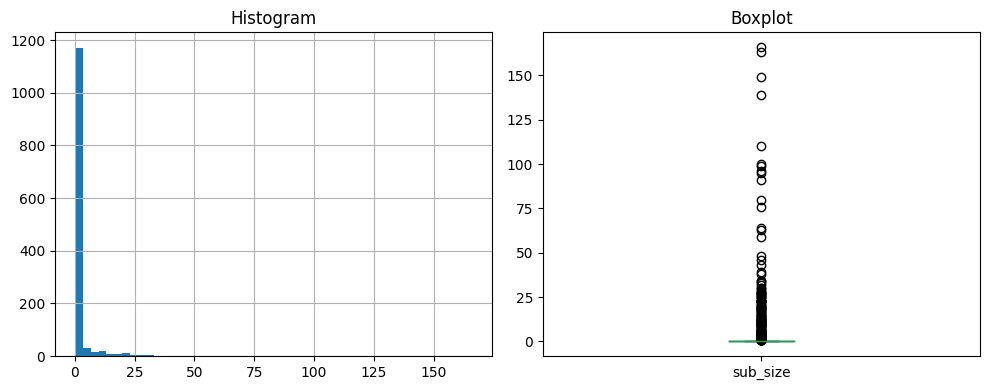

In [ ]:
# sub_size 열의 이상값 두개 삭제한 결과
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train2['sub_size'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train2['sub_size'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
train2.head(3)

,person_id,Sex,past_login_total,past_1_month_login,past_1_week_login,sub_size,email_type,phone_rat,apple_rat,login
0,0,0,3.0,1.0,1.0,0.0,0,0.000000,0.0,1
1,1,1,111.0,26.0,7.0,2.0,0,0.072072,0.0,1
2,3,1,13.0,13.0,11.0,7.0,0,0.076923,1.0,1


# 6. 랜덤포레스트 그려보기
- train : 이상값 포함한 원본 데이터
- train2 : 이상값 삭제한 데이터

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 특성과 레이블 분리
X_train = train.drop(columns=['login'])
y_train = train['login']

# 랜덤 포레스트 모델 정의 및 훈련
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)


RandomForestClassifier()

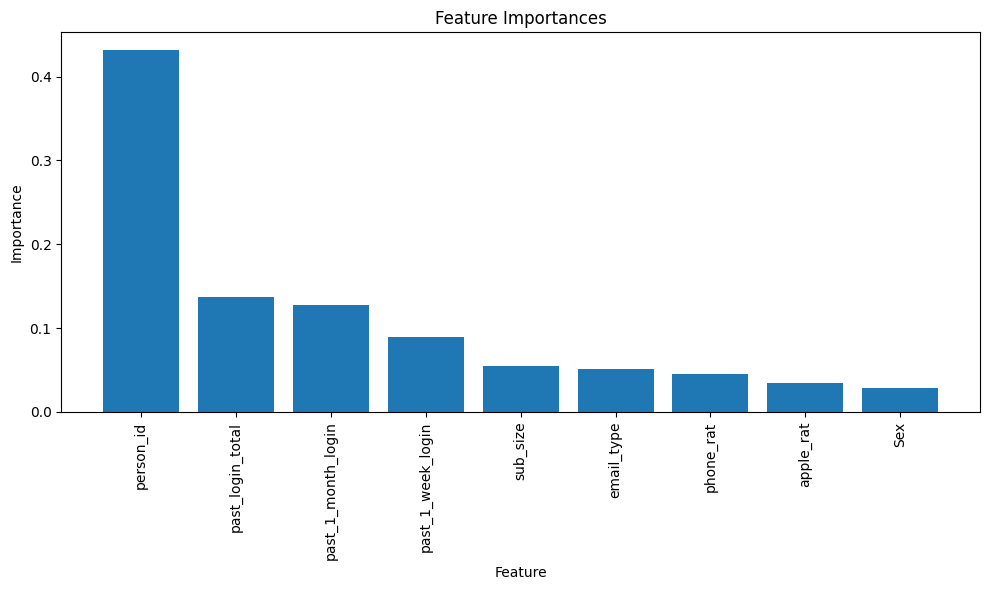

In [ ]:
import matplotlib.pyplot as plt

# 특성 중요도를 가져옴
importances = rf_classifier.feature_importances_

# 특성 중요도를 기준으로 내림차순으로 정렬
indices = np.argsort(importances)[::-1]

# 특성 이름 가져오기
feature_names = X_train.columns

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

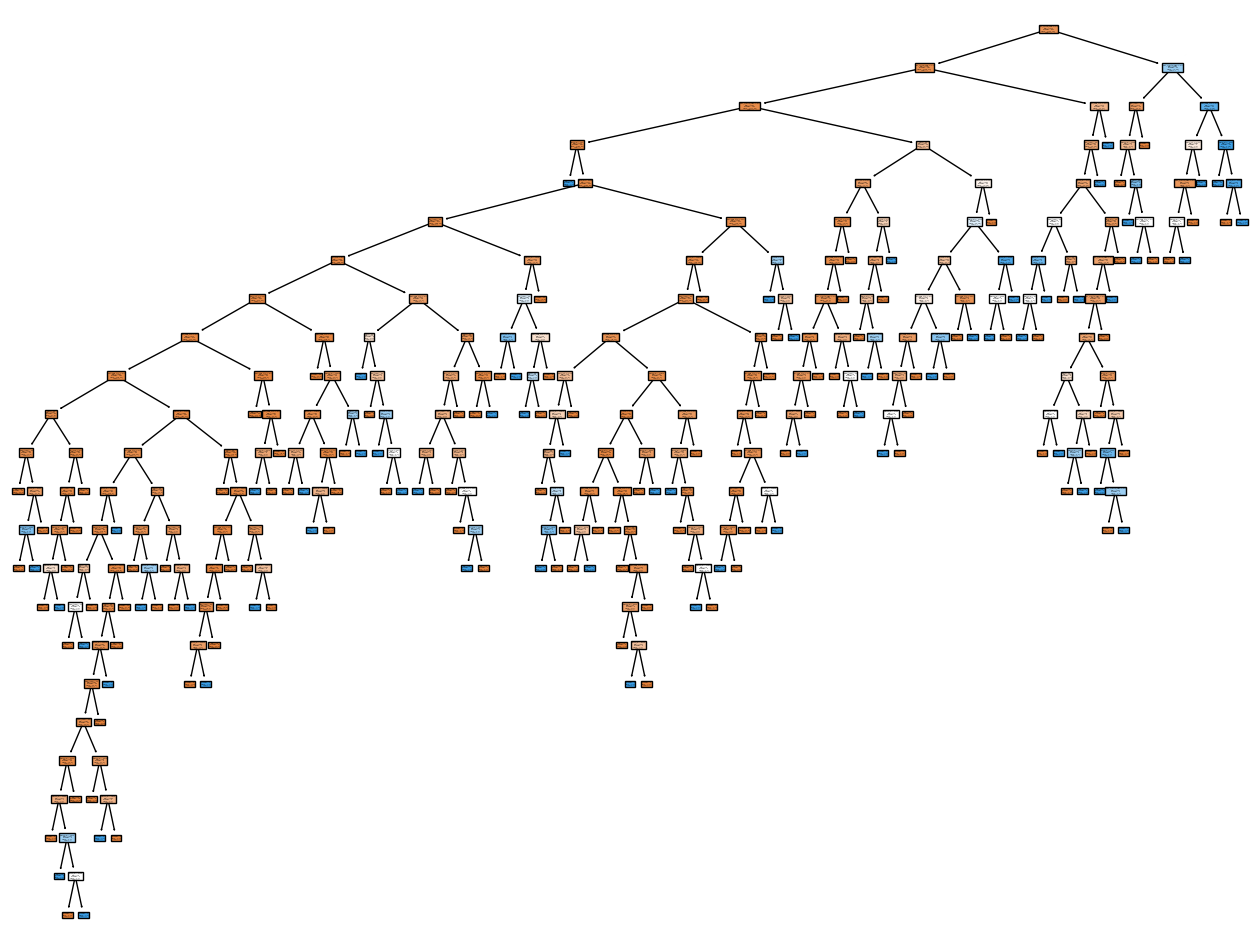

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

# 첫 번째 의사 결정 트리 가져오기
first_tree = rf_classifier.estimators_[0]

# 트리 시각화
plt.figure(figsize=(16, 12))
tree.plot_tree(first_tree, feature_names=X_train.columns, class_names=['0', '1'], filled=True)
plt.show()


train2에 대해

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 특성과 레이블 분리
X_train2 = train2.drop(columns=['login'])
y_train2 = train2['login']

# 랜덤 포레스트 모델 정의 및 훈련
rf_classifier2 = RandomForestClassifier()
rf_classifier2.fit(X_train2, y_train2)


RandomForestClassifier()

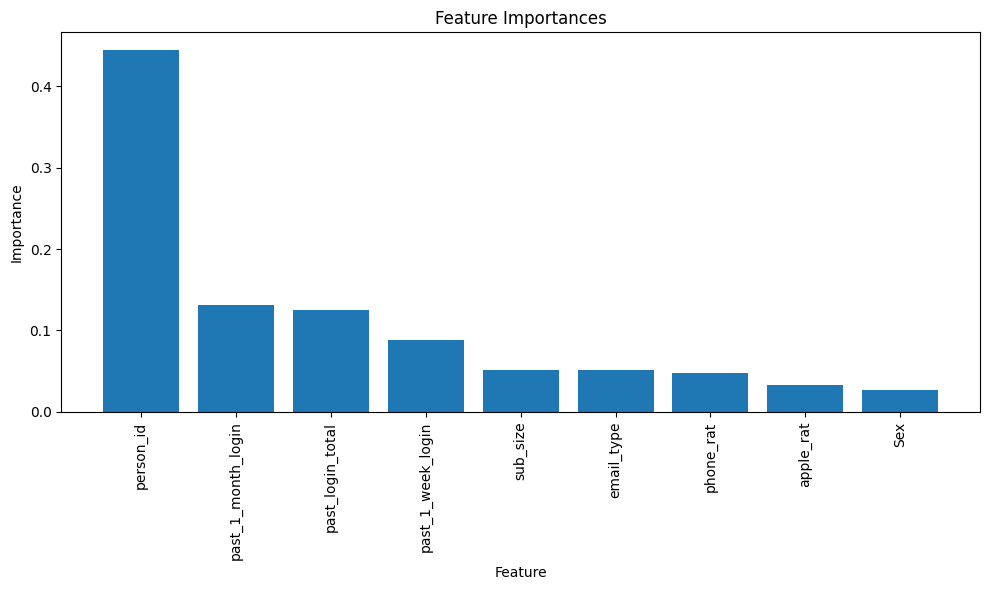

In [ ]:
import matplotlib.pyplot as plt

# 특성 중요도를 가져옴
importances = rf_classifier2.feature_importances_

# 특성 중요도를 기준으로 내림차순으로 정렬
indices = np.argsort(importances)[::-1]

# 특성 이름 가져오기
feature_names = X_train.columns

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

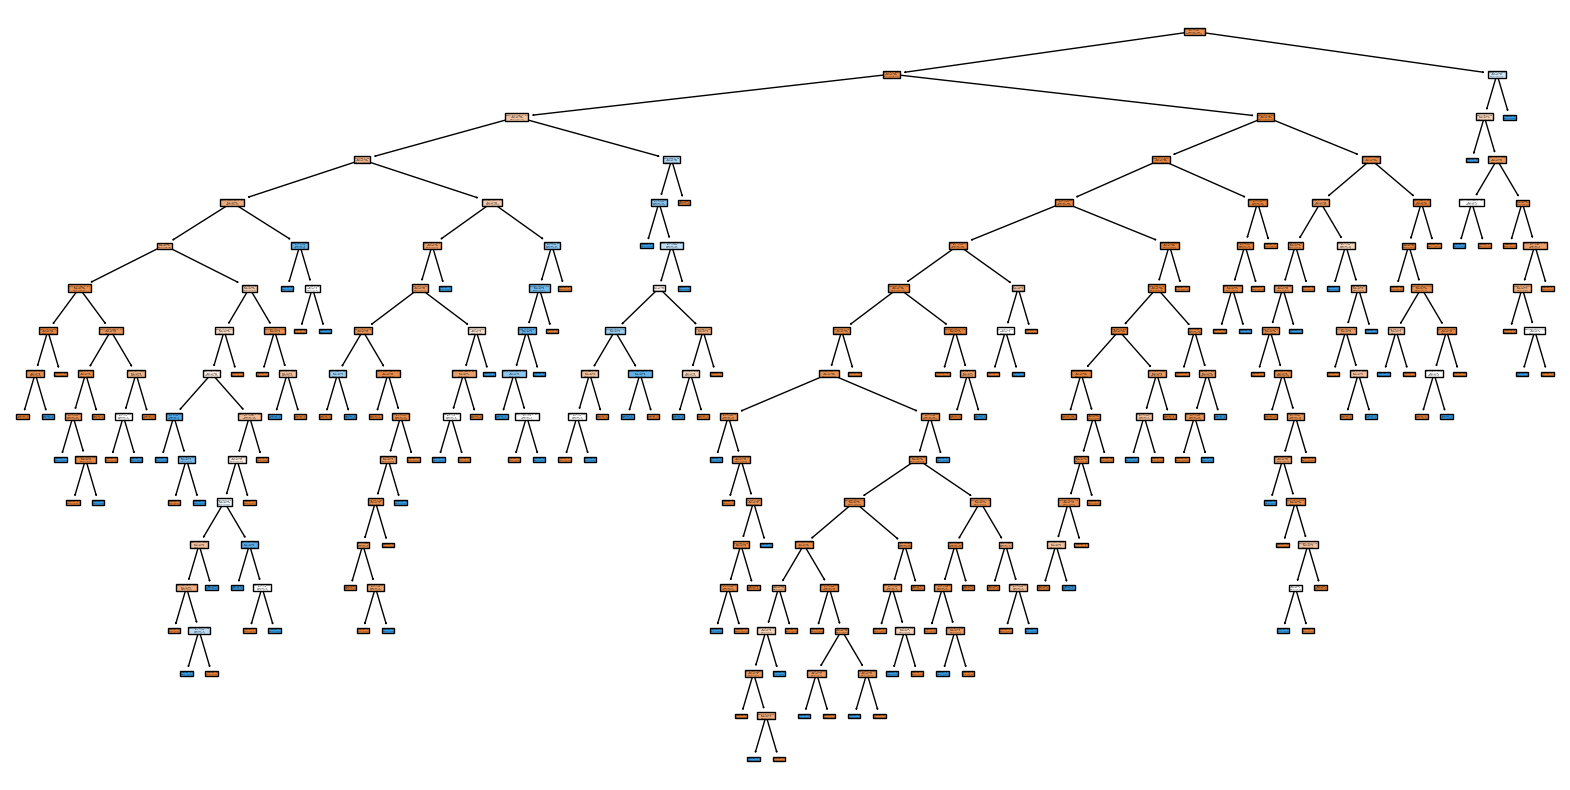

In [ ]:
from sklearn.tree import plot_tree

# 첫 번째 트리 선택
tree_to_plot = rf_classifier2.estimators_[0]

# 트리 시각화
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=X_train.columns, filled=True)
plt.show()


# 7. 특성 상관 관계 분석
- 상관 행렬 계산
- heat map
- Spearman 상관 계수
- 특성 선택 알고리즘

7-1) 상관 행렬 계산 -> heatmap

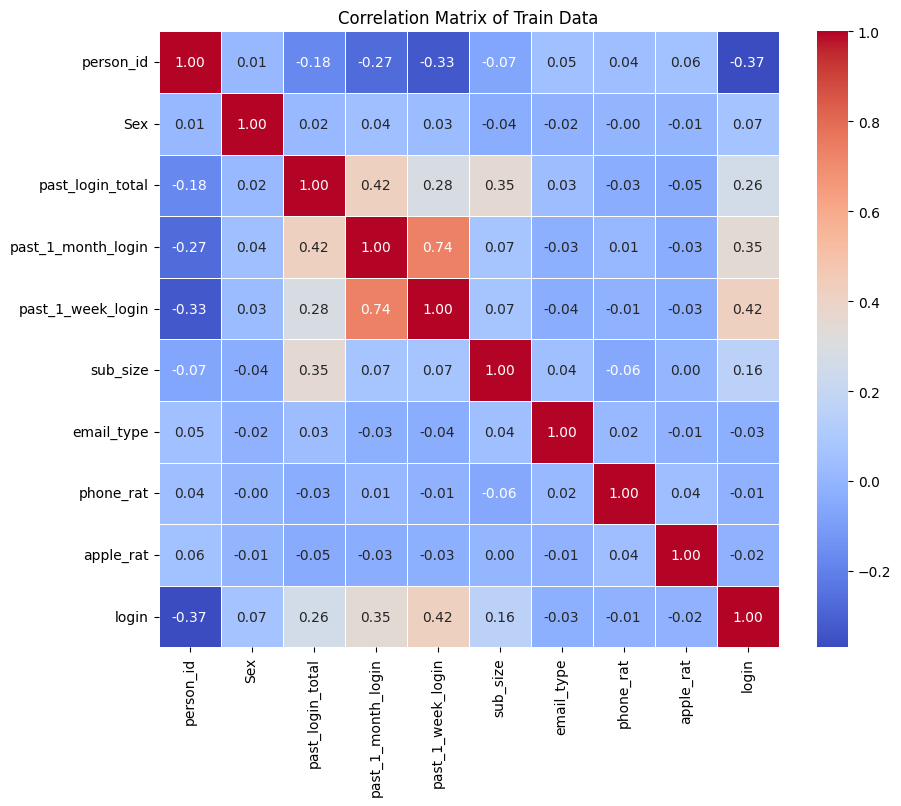

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# train 데이터 로드 (예시로, 실제 데이터에 맞게 수정해야 합니다)
train = pd.read_csv("train.csv")

# 상관 행렬 계산
correlation_matrix = train.corr()

# Heatmap 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Train Data")
plt.show()


7-2)  Spearman 상관 계수

In [ ]:
import pandas as pd

# train 데이터 로드 (예시로, 실제 데이터에 맞게 수정해야 합니다)
train = pd.read_csv("train.csv")

# Spearman 상관 계수 계산
spearman_corr = train.corr(method='spearman')

# 결과 출력
print("Spearman Correlation Matrix:")
print(spearman_corr)

Spearman Correlation Matrix:
                    person_id       Sex  past_login_total  past_1_month_login  \
person_id            1.000000  0.011538         -0.183257           -0.609502   
Sex                  0.011538  1.000000         -0.044680            0.033038   
past_login_total    -0.183257 -0.044680          1.000000            0.253855   
past_1_month_login  -0.609502  0.033038          0.253855            1.000000   
past_1_week_login   -0.504051  0.012724          0.211767            0.786616   
sub_size            -0.123327  0.005223          0.395702            0.134703   
email_type           0.062669 -0.014805         -0.047680           -0.074013   
phone_rat           -0.037427  0.008737          0.148098            0.055116   
apple_rat            0.018069  0.003402          0.009035           -0.000472   
login               -0.366702  0.068019          0.188553            0.473432   

                    past_1_week_login  sub_size  email_type  phone_rat  \
perso

7-3) 특성 선택 알고리즘
- 가장 중요한 특성 -> person id는 실제로 중요한 내용이 아님 -> 빼고 튜닝해보기?

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

train = pd.read_csv("train.csv")
X_train =  train.drop(labels='login',axis=1)
y_train = train['login']

# 랜덤 포레스트 모델 초기화
rf = RandomForestClassifier()

# 특성 선택 알고리즘 적용
selector = SelectFromModel(estimator=rf)
selector.fit(X_train, y_train)

# 선택된 특성 확인
selected_features = X_train.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['person_id', 'past_login_total', 'past_1_month_login'], dtype='object')


# 8. 이상값 제거한 데이터인 train2로 BayesianOptimization

In [ ]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 2.0 MB/s eta 0:00:00


In [ ]:
!pip install bayesian-optimization

In [ ]:
X = train2.drop(labels='login',axis=1)
y = train2['login']

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
from sklearn.metrics import confusion_matrix,classification_report,precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from bayes_opt import BayesianOptimization


In [ ]:
import random
random.seed(42)

In [ ]:
# 시도1 -> 제출1
# 3. balanced + 언더샘플링 + f1-score로 데이터 편향 해결
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, f1_score
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight

# 언더샘플링을 통해 클래스 불균형 해결
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# 훈련 및 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 클래스 가중치 계산
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# F1 점수를 사용하여 모델 평가
scorer = make_scorer(f1_score)

# 탐색할 하이퍼파라미터 공간 정의
param_space = {
    'n_estimators': Integer(10, 1000),                # 나무의 수
    'criterion': Categorical(['gini', 'entropy']),    # 분할 기준
    'max_depth': Integer(1, 100),                     # 트리의 최대 깊이
    'min_samples_split': Integer(2, 30),              # 내부 노드를 분할하는데 필요한 최소 샘플 수
    'min_samples_leaf': Integer(1, 30),               # 리프 노드에 필요한 최소 샘플 수
    'min_weight_fraction_leaf': Real(0.0, 0.5),       # 가중치 고려 최소 리프 노드 크기
    'max_features': Categorical(['auto', 'sqrt', 'log2', None]),  # 각 노드에서 분할에 사용할 특성의 최대 수
    'max_leaf_nodes': Integer(2, 120),                # 리프 노드의 최대 수
    'min_impurity_decrease': Real(0.0, 0.5),          # 분할을 위한 최소 불순도 감소
    'bootstrap': Categorical([True, False])           # 데이터 중복 사용 여부
}

# Bayesian Optimization을 위한 검색 객체 정의
opt = BayesSearchCV(
    estimator=RandomForestClassifier(class_weight=class_weights_dict), # 클래스 가중치 적용
    search_spaces=param_space,
    scoring=scorer,
    n_iter=50, # 반복 횟수
    cv=5,      # 교차 검증 폴드 수
    n_jobs=-1, # 병렬 처리를 위한 CPU 코어 수 (-1은 모든 가능한 코어 사용)
    verbose=0
)

# Bayesian Optimization 실행
opt.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", opt.best_params_)

# 최적의 하이퍼파라미터를 가진 모델의 성능 출력
best_model = opt.best_estimator_
best_score = opt.best_score_
print("최적의 하이퍼파라미터를 가진 모델의 성능 (평균 F1 점수):", best_score)

# 테스트 데이터에서 모델 평가
test_score = f1_score(y_test, best_model.predict(X_test))
print("테스트 데이터에서 모델의 성능 (F1 점수):", test_score)


최적의 하이퍼파라미터: OrderedDict([('bootstrap', False), ('criterion', 'entropy'), ('max_depth', 78), ('max_features', None), ('max_leaf_nodes', 2), ('min_impurity_decrease', 0.06800411338244937), ('min_samples_leaf', 7), ('min_samples_split', 9), ('min_weight_fraction_leaf', 0.43509273088545847), ('n_estimators', 807)])
최적의 하이퍼파라미터를 가진 모델의 성능 (평균 F1 점수): 0.7440858243168897
테스트 데이터에서 모델의 성능 (F1 점수): 0.7636363636363636


In [ ]:
# 시도2
# 3. balanced + 언더샘플링 + f1-score로 데이터 편향 해결
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, f1_score
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight

# 언더샘플링을 통해 클래스 불균형 해결
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# 훈련 및 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 클래스 가중치 계산
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# F1 점수를 사용하여 모델 평가
scorer = make_scorer(f1_score)

# 탐색할 하이퍼파라미터 공간 정의
param_space = {
    'n_estimators': Integer(10, 1000),                # 나무의 수
    'criterion': Categorical(['gini', 'entropy']),    # 분할 기준
    'max_depth': Integer(1, 100),                     # 트리의 최대 깊이
    'min_samples_split': Integer(2, 30),              # 내부 노드를 분할하는데 필요한 최소 샘플 수
    'min_samples_leaf': Integer(1, 30),               # 리프 노드에 필요한 최소 샘플 수
    'min_weight_fraction_leaf': Real(0.0, 0.5),       # 가중치 고려 최소 리프 노드 크기
    'max_features': Categorical(['auto', 'sqrt', 'log2', None]),  # 각 노드에서 분할에 사용할 특성의 최대 수
    'max_leaf_nodes': Integer(2, 120),                # 리프 노드의 최대 수
    'min_impurity_decrease': Real(0.0, 0.5),          # 분할을 위한 최소 불순도 감소
    'bootstrap': Categorical([True, False])           # 데이터 중복 사용 여부
}

# Bayesian Optimization을 위한 검색 객체 정의
opt = BayesSearchCV(
    estimator=RandomForestClassifier(class_weight=class_weights_dict), # 클래스 가중치 적용
    search_spaces=param_space,
    scoring=scorer,
    n_iter=50, # 반복 횟수
    cv=5,      # 교차 검증 폴드 수
    n_jobs=-1, # 병렬 처리를 위한 CPU 코어 수 (-1은 모든 가능한 코어 사용)
    verbose=0
)

# Bayesian Optimization 실행
opt.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", opt.best_params_)

# 최적의 하이퍼파라미터를 가진 모델의 성능 출력
best_model = opt.best_estimator_
best_score = opt.best_score_
print("최적의 하이퍼파라미터를 가진 모델의 성능 (평균 F1 점수):", best_score)

# 테스트 데이터에서 모델 평가
test_score = f1_score(y_test, best_model.predict(X_test))
print("테스트 데이터에서 모델의 성능 (F1 점수):", test_score)


최적의 하이퍼파라미터: OrderedDict([('bootstrap', True), ('criterion', 'entropy'), ('max_depth', 26), ('max_features', 'log2'), ('max_leaf_nodes', 27), ('min_impurity_decrease', 0.12444855961131794), ('min_samples_leaf', 15), ('min_samples_split', 20), ('min_weight_fraction_leaf', 0.4138005155907446), ('n_estimators', 119)])
최적의 하이퍼파라미터를 가진 모델의 성능 (평균 F1 점수): 0.7440858243168897
테스트 데이터에서 모델의 성능 (F1 점수): 0.7857142857142856


In [ ]:
# 시도3
# 3. balanced + 언더샘플링 + f1-score로 데이터 편향 해결
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, f1_score
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight

# 언더샘플링을 통해 클래스 불균형 해결
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# 훈련 및 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 클래스 가중치 계산
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# F1 점수를 사용하여 모델 평가
scorer = make_scorer(f1_score)

# 탐색할 하이퍼파라미터 공간 정의
param_space = {
    'n_estimators': Integer(10, 1000),                # 나무의 수
    'criterion': Categorical(['gini', 'entropy']),    # 분할 기준
    'max_depth': Integer(1, 100),                     # 트리의 최대 깊이
    'min_samples_split': Integer(2, 30),              # 내부 노드를 분할하는데 필요한 최소 샘플 수
    'min_samples_leaf': Integer(1, 30),               # 리프 노드에 필요한 최소 샘플 수
    'min_weight_fraction_leaf': Real(0.0, 0.5),       # 가중치 고려 최소 리프 노드 크기
    'max_features': Categorical(['auto', 'sqrt', 'log2', None]),  # 각 노드에서 분할에 사용할 특성의 최대 수
    'max_leaf_nodes': Integer(2, 120),                # 리프 노드의 최대 수
    'min_impurity_decrease': Real(0.0, 0.5),          # 분할을 위한 최소 불순도 감소
    'bootstrap': Categorical([True, False])           # 데이터 중복 사용 여부
}

# Bayesian Optimization을 위한 검색 객체 정의
opt = BayesSearchCV(
    estimator=RandomForestClassifier(class_weight=class_weights_dict), # 클래스 가중치 적용
    search_spaces=param_space,
    scoring=scorer,
    n_iter=50, # 반복 횟수
    cv=5,      # 교차 검증 폴드 수
    n_jobs=-1, # 병렬 처리를 위한 CPU 코어 수 (-1은 모든 가능한 코어 사용)
    verbose=0
)

# Bayesian Optimization 실행
opt.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", opt.best_params_)

# 최적의 하이퍼파라미터를 가진 모델의 성능 출력
best_model = opt.best_estimator_
best_score = opt.best_score_
print("최적의 하이퍼파라미터를 가진 모델의 성능 (평균 F1 점수):", best_score)

# 테스트 데이터에서 모델 평가
test_score = f1_score(y_test, best_model.predict(X_test))
print("테스트 데이터에서 모델의 성능 (F1 점수):", test_score)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


최적의 하이퍼파라미터: OrderedDict([('bootstrap', True), ('criterion', 'gini'), ('max_depth', 21), ('max_features', 'auto'), ('max_leaf_nodes', 40), ('min_impurity_decrease', 0.1654470329128447), ('min_samples_leaf', 8), ('min_samples_split', 8), ('min_weight_fraction_leaf', 0.43288821016338536), ('n_estimators', 717)])
최적의 하이퍼파라미터를 가진 모델의 성능 (평균 F1 점수): 0.7421456592188299
테스트 데이터에서 모델의 성능 (F1 점수): 0.7636363636363636


In [ ]:
# 1,2,3제출 후 다시 돌림 1
# 3. balanced + 언더샘플링 + f1-score로 데이터 편향 해결
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, f1_score
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight

# 언더샘플링을 통해 클래스 불균형 해결
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# 훈련 및 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 클래스 가중치 계산
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# F1 점수를 사용하여 모델 평가
scorer = make_scorer(f1_score)

# 탐색할 하이퍼파라미터 공간 정의
param_space = {
    'n_estimators': Integer(10, 1000),                # 나무의 수
    'criterion': Categorical(['gini', 'entropy']),    # 분할 기준
    'max_depth': Integer(1, 100),                     # 트리의 최대 깊이
    'min_samples_split': Integer(2, 30),              # 내부 노드를 분할하는데 필요한 최소 샘플 수
    'min_samples_leaf': Integer(1, 30),               # 리프 노드에 필요한 최소 샘플 수
    'min_weight_fraction_leaf': Real(0.0, 0.5),       # 가중치 고려 최소 리프 노드 크기
    'max_features': Categorical(['auto', 'sqrt', 'log2', None]),  # 각 노드에서 분할에 사용할 특성의 최대 수
    'max_leaf_nodes': Integer(2, 120),                # 리프 노드의 최대 수
    'min_impurity_decrease': Real(0.0, 0.5),          # 분할을 위한 최소 불순도 감소
    'bootstrap': Categorical([True, False])           # 데이터 중복 사용 여부
}

# Bayesian Optimization을 위한 검색 객체 정의
opt = BayesSearchCV(
    estimator=RandomForestClassifier(class_weight=class_weights_dict), # 클래스 가중치 적용
    search_spaces=param_space,
    scoring=scorer,
    n_iter=50, # 반복 횟수
    cv=5,      # 교차 검증 폴드 수
    n_jobs=-1, # 병렬 처리를 위한 CPU 코어 수 (-1은 모든 가능한 코어 사용)
    verbose=0
)

# Bayesian Optimization 실행
opt.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", opt.best_params_)

# 최적의 하이퍼파라미터를 가진 모델의 성능 출력
best_model = opt.best_estimator_
best_score = opt.best_score_
print("최적의 하이퍼파라미터를 가진 모델의 성능 (평균 F1 점수):", best_score)

# 테스트 데이터에서 모델 평가
test_score = f1_score(y_test, best_model.predict(X_test))
print("테스트 데이터에서 모델의 성능 (F1 점수):", test_score)


최적의 하이퍼파라미터: OrderedDict([('bootstrap', True), ('criterion', 'entropy'), ('max_depth', 61), ('max_features', None), ('max_leaf_nodes', 51), ('min_impurity_decrease', 0.28247339412948336), ('min_samples_leaf', 13), ('min_samples_split', 27), ('min_weight_fraction_leaf', 0.44442555173529824), ('n_estimators', 674)])
최적의 하이퍼파라미터를 가진 모델의 성능 (평균 F1 점수): 0.7385109114249037
테스트 데이터에서 모델의 성능 (F1 점수): 0.7636363636363636


In [ ]:
# 1,2,3제출 후 다시 돌림 2

# 3. balanced + 언더샘플링 + f1-score로 데이터 편향 해결
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, f1_score
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight

# 언더샘플링을 통해 클래스 불균형 해결
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# 훈련 및 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 클래스 가중치 계산
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# F1 점수를 사용하여 모델 평가
scorer = make_scorer(f1_score)

# 탐색할 하이퍼파라미터 공간 정의
param_space = {
    'n_estimators': Integer(10, 1000),                # 나무의 수
    'criterion': Categorical(['gini', 'entropy']),    # 분할 기준
    'max_depth': Integer(1, 100),                     # 트리의 최대 깊이
    'min_samples_split': Integer(2, 30),              # 내부 노드를 분할하는데 필요한 최소 샘플 수
    'min_samples_leaf': Integer(1, 30),               # 리프 노드에 필요한 최소 샘플 수
    'min_weight_fraction_leaf': Real(0.0, 0.5),       # 가중치 고려 최소 리프 노드 크기
    'max_features': Categorical(['auto', 'sqrt', 'log2', None]),  # 각 노드에서 분할에 사용할 특성의 최대 수
    'max_leaf_nodes': Integer(2, 120),                # 리프 노드의 최대 수
    'min_impurity_decrease': Real(0.0, 0.5),          # 분할을 위한 최소 불순도 감소
    'bootstrap': Categorical([True, False])           # 데이터 중복 사용 여부
}

# Bayesian Optimization을 위한 검색 객체 정의
opt = BayesSearchCV(
    estimator=RandomForestClassifier(class_weight=class_weights_dict), # 클래스 가중치 적용
    search_spaces=param_space,
    scoring=scorer,
    n_iter=50, # 반복 횟수
    cv=5,      # 교차 검증 폴드 수
    n_jobs=-1, # 병렬 처리를 위한 CPU 코어 수 (-1은 모든 가능한 코어 사용)
    verbose=0
)

# Bayesian Optimization 실행
opt.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", opt.best_params_)

# 최적의 하이퍼파라미터를 가진 모델의 성능 출력
best_model = opt.best_estimator_
best_score = opt.best_score_
print("최적의 하이퍼파라미터를 가진 모델의 성능 (평균 F1 점수):", best_score)

# 테스트 데이터에서 모델 평가
test_score = f1_score(y_test, best_model.predict(X_test))
print("테스트 데이터에서 모델의 성능 (F1 점수):", test_score)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


최적의 하이퍼파라미터: OrderedDict([('bootstrap', False), ('criterion', 'entropy'), ('max_depth', 32), ('max_features', 'auto'), ('max_leaf_nodes', 62), ('min_impurity_decrease', 0.12541379939179312), ('min_samples_leaf', 12), ('min_samples_split', 14), ('min_weight_fraction_leaf', 0.37718615082079), ('n_estimators', 526)])
최적의 하이퍼파라미터를 가진 모델의 성능 (평균 F1 점수): 0.734285340297819
테스트 데이터에서 모델의 성능 (F1 점수): 0.7307692307692307


8-2)  person id 열 빼고 튜닝

In [ ]:
train2.head(2)

,person_id,Sex,past_login_total,past_1_month_login,past_1_week_login,sub_size,email_type,phone_rat,apple_rat,login
0,0,0,3.0,1.0,1.0,0.0,0,0.000000,0.0,1
1,1,1,111.0,26.0,7.0,2.0,0,0.072072,0.0,1


In [ ]:
y = train2['login']
y

0       1
1       1
2       1
3       1
4       1
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: login, Length: 1304, dtype: int64

In [ ]:
y = train2['login']
X = train2[['Sex', 'past_login_total','past_1_month_login','past_1_week_login','sub_size','email_type','phone_rat','apple_rat']]

In [ ]:
X

,Sex,past_login_total,past_1_month_login,past_1_week_login,sub_size,email_type,phone_rat,apple_rat
0,0,3.0,1.0,1.0,0.0,0,0.000000,0.000000
1,1,111.0,26.0,7.0,2.0,0,0.072072,0.000000
2,1,13.0,13.0,11.0,7.0,0,0.076923,1.000000
3,1,28.0,12.0,5.0,0.0,0,0.071429,0.071429
4,1,4.0,4.0,4.0,0.0,2,0.000000,0.000000
...,...,...,...,...,...,...,...,...
1304,1,1.0,0.0,0.0,0.0,2,0.000000,0.000000
1305,1,1.0,0.0,0.0,0.0,2,0.000000,0.000000
1306,1,1.0,0.0,0.0,0.0,0,0.000000,1.000000
1307,1,1.0,0.0,0.0,0.0,0,0.000000,1.000000


In [ ]:
# 제출2
# 3. balanced + 언더샘플링 + f1-score로 데이터 편향 해결
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, f1_score
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight

# 언더샘플링을 통해 클래스 불균형 해결
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# 훈련 및 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 클래스 가중치 계산
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# F1 점수를 사용하여 모델 평가
scorer = make_scorer(f1_score)

# 탐색할 하이퍼파라미터 공간 정의
param_space = {
    'n_estimators': Integer(10, 1000),                # 나무의 수
    'criterion': Categorical(['gini', 'entropy']),    # 분할 기준
    'max_depth': Integer(1, 100),                     # 트리의 최대 깊이
    'min_samples_split': Integer(2, 30),              # 내부 노드를 분할하는데 필요한 최소 샘플 수
    'min_samples_leaf': Integer(1, 30),               # 리프 노드에 필요한 최소 샘플 수
    'min_weight_fraction_leaf': Real(0.0, 0.5),       # 가중치 고려 최소 리프 노드 크기
    'max_features': Categorical(['auto', 'sqrt', 'log2', None]),  # 각 노드에서 분할에 사용할 특성의 최대 수
    'max_leaf_nodes': Integer(2, 120),                # 리프 노드의 최대 수
    'min_impurity_decrease': Real(0.0, 0.5),          # 분할을 위한 최소 불순도 감소
    'bootstrap': Categorical([True, False])           # 데이터 중복 사용 여부
}

# Bayesian Optimization을 위한 검색 객체 정의
opt = BayesSearchCV(
    estimator=RandomForestClassifier(class_weight=class_weights_dict), # 클래스 가중치 적용
    search_spaces=param_space,
    scoring=scorer,
    n_iter=50, # 반복 횟수
    cv=5,      # 교차 검증 폴드 수
    n_jobs=-1, # 병렬 처리를 위한 CPU 코어 수 (-1은 모든 가능한 코어 사용)
    verbose=0
)

# Bayesian Optimization 실행
opt.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", opt.best_params_)

# 최적의 하이퍼파라미터를 가진 모델의 성능 출력
best_model = opt.best_estimator_
best_score = opt.best_score_
print("최적의 하이퍼파라미터를 가진 모델의 성능 (평균 F1 점수):", best_score)

# 테스트 데이터에서 모델 평가
test_score = f1_score(y_test, best_model.predict(X_test))
print("테스트 데이터에서 모델의 성능 (F1 점수):", test_score)


최적의 하이퍼파라미터: OrderedDict([('bootstrap', True), ('criterion', 'entropy'), ('max_depth', 49), ('max_features', 'auto'), ('max_leaf_nodes', 98), ('min_impurity_decrease', 0.21034648785433835), ('min_samples_leaf', 22), ('min_samples_split', 23), ('min_weight_fraction_leaf', 0.3583329732558495), ('n_estimators', 82)])
최적의 하이퍼파라미터를 가진 모델의 성능 (평균 F1 점수): 0.7152329541803227
테스트 데이터에서 모델의 성능 (F1 점수): 0.7058823529411764


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


- 다중공선성 문제 해결 위해, past_1_month_login 열과 past_1_week_login열을 하나씩 지우며 실행해보기
 - person_id 열은 다시 포함

In [ ]:
# 1. past_1_month_login을 지운 경우-> 'n_estimators', 10으로 너무 작게 나와 제출 X
y = train2['login']
X = train2[['person_id','Sex', 'past_login_total','past_1_week_login','sub_size','email_type','phone_rat','apple_rat']]

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, f1_score
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight

# 언더샘플링을 통해 클래스 불균형 해결
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# 훈련 및 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 클래스 가중치 계산
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# F1 점수를 사용하여 모델 평가
scorer = make_scorer(f1_score)

# 탐색할 하이퍼파라미터 공간 정의
param_space = {
    'n_estimators': Integer(10, 1000),                # 나무의 수
    'criterion': Categorical(['gini', 'entropy']),    # 분할 기준
    'max_depth': Integer(1, 100),                     # 트리의 최대 깊이
    'min_samples_split': Integer(2, 30),              # 내부 노드를 분할하는데 필요한 최소 샘플 수
    'min_samples_leaf': Integer(1, 30),               # 리프 노드에 필요한 최소 샘플 수
    'min_weight_fraction_leaf': Real(0.0, 0.5),       # 가중치 고려 최소 리프 노드 크기
    'max_features': Categorical(['auto', 'sqrt', 'log2', None]),  # 각 노드에서 분할에 사용할 특성의 최대 수
    'max_leaf_nodes': Integer(2, 120),                # 리프 노드의 최대 수
    'min_impurity_decrease': Real(0.0, 0.5),          # 분할을 위한 최소 불순도 감소
    'bootstrap': Categorical([True, False])           # 데이터 중복 사용 여부
}

# Bayesian Optimization을 위한 검색 객체 정의
opt = BayesSearchCV(
    estimator=RandomForestClassifier(class_weight=class_weights_dict), # 클래스 가중치 적용
    search_spaces=param_space,
    scoring=scorer,
    n_iter=50, # 반복 횟수
    cv=5,      # 교차 검증 폴드 수
    n_jobs=-1, # 병렬 처리를 위한 CPU 코어 수 (-1은 모든 가능한 코어 사용)
    verbose=0
)

# Bayesian Optimization 실행
opt.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", opt.best_params_)

# 최적의 하이퍼파라미터를 가진 모델의 성능 출력
best_model = opt.best_estimator_
best_score = opt.best_score_
print("최적의 하이퍼파라미터를 가진 모델의 성능 (평균 F1 점수):", best_score)

# 테스트 데이터에서 모델 평가
test_score = f1_score(y_test, best_model.predict(X_test))
print("테스트 데이터에서 모델의 성능 (F1 점수):", test_score)


최적의 하이퍼파라미터: OrderedDict([('bootstrap', False), ('criterion', 'entropy'), ('max_depth', 100), ('max_features', 'auto'), ('max_leaf_nodes', 116), ('min_impurity_decrease', 0.01938206870753432), ('min_samples_leaf', 1), ('min_samples_split', 14), ('min_weight_fraction_leaf', 0.0719383178633861), ('n_estimators', 10)])
최적의 하이퍼파라미터를 가진 모델의 성능 (평균 F1 점수): 0.7276110068792995
테스트 데이터에서 모델의 성능 (F1 점수): 0.625


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
# 2. past_1_week_login 지운 경우
y = train2['login']
X = train2[['person_id','Sex', 'past_login_total','past_1_month_login','sub_size','email_type','phone_rat','apple_rat']]

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, f1_score
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight

# 언더샘플링을 통해 클래스 불균형 해결
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# 훈련 및 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 클래스 가중치 계산
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# F1 점수를 사용하여 모델 평가
scorer = make_scorer(f1_score)

# 탐색할 하이퍼파라미터 공간 정의
param_space = {
    'n_estimators': Integer(10, 1000),                # 나무의 수
    'criterion': Categorical(['gini', 'entropy']),    # 분할 기준
    'max_depth': Integer(1, 100),                     # 트리의 최대 깊이
    'min_samples_split': Integer(2, 30),              # 내부 노드를 분할하는데 필요한 최소 샘플 수
    'min_samples_leaf': Integer(1, 30),               # 리프 노드에 필요한 최소 샘플 수
    'min_weight_fraction_leaf': Real(0.0, 0.5),       # 가중치 고려 최소 리프 노드 크기
    'max_features': Categorical(['auto', 'sqrt', 'log2', None]),  # 각 노드에서 분할에 사용할 특성의 최대 수
    'max_leaf_nodes': Integer(2, 120),                # 리프 노드의 최대 수
    'min_impurity_decrease': Real(0.0, 0.5),          # 분할을 위한 최소 불순도 감소
    'bootstrap': Categorical([True, False])           # 데이터 중복 사용 여부
}

# Bayesian Optimization을 위한 검색 객체 정의
opt = BayesSearchCV(
    estimator=RandomForestClassifier(class_weight=class_weights_dict), # 클래스 가중치 적용
    search_spaces=param_space,
    scoring=scorer,
    n_iter=50, # 반복 횟수
    cv=5,      # 교차 검증 폴드 수
    n_jobs=-1, # 병렬 처리를 위한 CPU 코어 수 (-1은 모든 가능한 코어 사용)
    verbose=0
)

# Bayesian Optimization 실행
opt.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", opt.best_params_)

# 최적의 하이퍼파라미터를 가진 모델의 성능 출력
best_model = opt.best_estimator_
best_score = opt.best_score_
print("최적의 하이퍼파라미터를 가진 모델의 성능 (평균 F1 점수):", best_score)

# 테스트 데이터에서 모델 평가
test_score = f1_score(y_test, best_model.predict(X_test))
print("테스트 데이터에서 모델의 성능 (F1 점수):", test_score)


최적의 하이퍼파라미터: OrderedDict([('bootstrap', True), ('criterion', 'gini'), ('max_depth', 81), ('max_features', 'log2'), ('max_leaf_nodes', 30), ('min_impurity_decrease', 0.0019916024180358853), ('min_samples_leaf', 23), ('min_samples_split', 25), ('min_weight_fraction_leaf', 0.5), ('n_estimators', 440)])
최적의 하이퍼파라미터를 가진 모델의 성능 (평균 F1 점수): 0.7551111126808999
테스트 데이터에서 모델의 성능 (F1 점수): 0.0
